In [1]:
%load_ext autoreload
%autoreload 2

%pylab inline
import torch
from models import *
from utils import load_dataset, training_steps, show_grid, configure_optimizer
import yaml
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [10]:
with open('./parameters/VAE_AFHQ_params.yaml', 'rb') as f:
    config = yaml.safe_load(f)

BS = config['dataset']['batch_size']
BS_test = 1000
BS_sample = 64
dataset, unnormalize, nb_classes = load_dataset(config)
dataloader = DataLoader(dataset, batch_size = BS, shuffle = True)
img_shape = dataloader.dataset[0][0].shape

test_data, _, _ = load_dataset(config, training = False)
test_dataloader = DataLoader(test_data, batch_size =BS_test, shuffle = True)

batch, label_test = next(iter(test_dataloader))
batch, label_test = batch.to(device), label_test.to(device)

In [14]:
vae = VAE_3D(config, img_shape, nb_classes)
vae = vae.to(device)

In [15]:
losses = training_steps(vae, dataloader, unnormalize)

VAE epoch: 8.000 Loss: 12111413.000:  31%|███▏      | 36/115 [01:08<02:29,  1.89s/it]


KeyboardInterrupt: 

In [18]:
plot(losses)

In [19]:
with torch.no_grad():
    out = vae(batch)
    loss_dict = vae.loss_function(out, batch, unnormalize)

In [21]:
loss_dict

{'loss': tensor(94743800., device='cuda:0'),
 'recon_loss': tensor(94743680., device='cuda:0'),
 'kl_loss': tensor(1239.4623, device='cuda:0')}

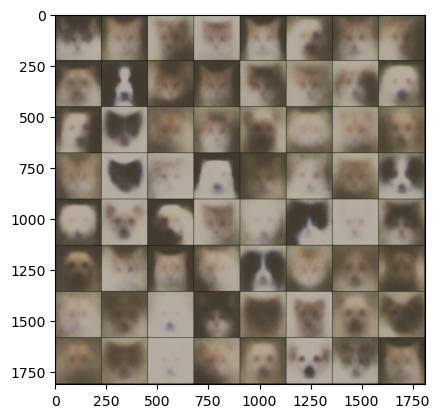

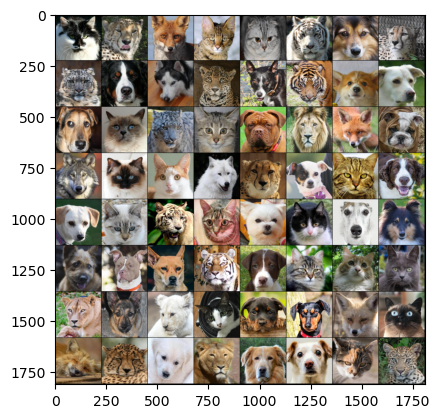

In [26]:
show_grid(unnormalize(out[0][:BS_sample]))
show_grid(unnormalize(batch[:BS_sample]))

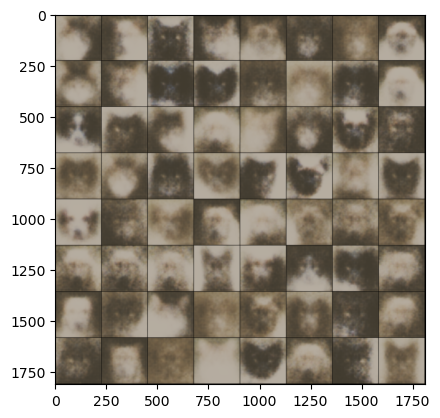

In [27]:
samp = vae.sample(BS_sample)
show_grid(unnormalize(samp))

# GAN

In [2]:
with open('./parameters/GAN_AFHQ_params.yaml', 'rb') as f:
    config = yaml.safe_load(f)

BS = config['dataset']['batch_size']
BS_test = 1000
BS_sample = 64
dataset, unnormalize, nb_classes = load_dataset(config)
dataloader = DataLoader(dataset, batch_size = BS, shuffle = True)
img_shape = dataloader.dataset[0][0].shape

test_data, _, _ = load_dataset(config, training = False)
test_dataloader = DataLoader(test_data, batch_size =BS_test, shuffle = True)

batch, label_test = next(iter(test_dataloader))
batch, label_test = batch.to(device), label_test.to(device)

In [3]:
with open('./parameters/GAN_AFHQ_params.yaml', 'rb') as f:
    config_gan = yaml.safe_load(f)

gan = GAN(config_gan, img_shape, nb_classes)
gan = gan.to(device)

In [4]:
losses = training_steps(gan, dataloader, unnormalize)

GAN epoch: 49.000 Loss D: 0.294 Loss G: 5.860: 100%|██████████| 458/458 [06:07<00:00,  1.25it/s]


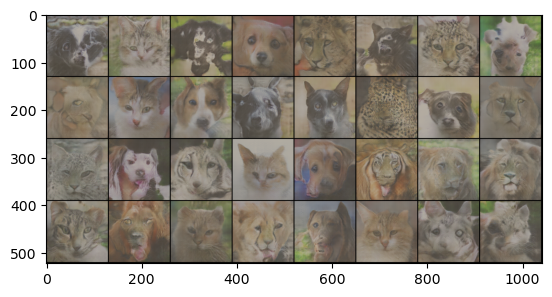

In [6]:
samp_gan = gan.sample(BS)
show_grid(unnormalize(samp_gan))